<a href="https://colab.research.google.com/github/tgusmao/programacao_ds/blob/master/TrabalhoPratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Prático de Programação para Ciências de Dados**

Dupla: 
*   Tammy Hikari Yanai Gusmão
*   Thalita Naiara Andre Alves


Trabalho Prático para obtenção de nota na disciplina de Programação para Ciências de Dados - Turma 1 de 2020.

##Instalações e Importações Utilzadas

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 8.2MB/s 
     |████████████████████████████████| 14.8MB 257kB/s 
     |████████████████████████████████| 10.9MB 12.9MB/s 


In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from random import sample
import string
import re
import time
from tabulate import tabulate
import collections
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns

##Importação da Base de Dados

Iniciando abaixo a leitura do arquivo CSV local, localizado no Drive compartilhado.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_original = pd.read_csv('/content/drive/Shared drives/trabalhoPratico_programacaoDS/dados-curso-completo.csv', sep = ',', skiprows = 0, encoding = 'utf-8')

In [ ]:
#cópia da base original
df_copia_original = df_original.copy()

##Resumo do dataset original



A base de dados contém informações sobre tuítes sobre a COVID-19, postados durante o primeiro semestre do ano de 2020. A base foi levemente pré-processada anteriormente pelo professor da disciplina.  

In [ ]:
print('Quantidade de linhas:', df_original.shape[0])
print('Quantidade de colunas:', df_original.shape[1])

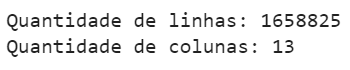

Como pode ser visto acima, o atributo *shape* retornou uma tupla contendo a quantidade de linhas e colunas que constituem a base: 1.658.825 linhas e 13 colunas. 

Abaixo observamos uma tabela contendo os nomes das colunas, os tipos preponderantes em cada uma delas, as quantidades de valores nulos, não nulos e únicos para cada coluna. 

In [ ]:
#Aquisição de lista contendo nome das colunas do dataset
colunas = []

for col in df_original.columns:
  colunas.append(col)

In [ ]:
#Aquisição da qntd. de valores nulos de cada coluna do dataset
qntd_nulos = []

lista_nulos = df_original.isnull().sum()

for x in lista_nulos:
  qntd_nulos.append(x)

In [ ]:
#Aquisição da qntd. de valores não nulos de cada coluna do dataset
qntd_nao_nulos = []

lista_nao_nulos = df_original.notnull().sum()

for x in lista_nao_nulos:
  qntd_nao_nulos.append(x)

In [ ]:
#Aquisão da qntd. de valores únicos de cada coluna do dataset
valores_unicos = []

for x in colunas:
  valores_unicos.append(int(df_original[x].nunique()))

In [ ]:
#Criação de um dicionário que servirá de base para o dataframe de resumo
dados = {'colunas': colunas,
         'tipos': df_original.dtypes,
         'qntd_nulos': qntd_nulos,
         'qntd_nao_nulos': qntd_nao_nulos,
         'qntd_valores_unicos': valores_unicos}

In [ ]:
resumo_dataset = pd.DataFrame (dados, columns = ['colunas','tipos', 'qntd_nulos', 'qntd_nao_nulos', 'qntd_valores_unicos']).reset_index(drop=True)

In [ ]:
print(tabulate(resumo_dataset, headers = 'keys', tablefmt = 'psql')) 

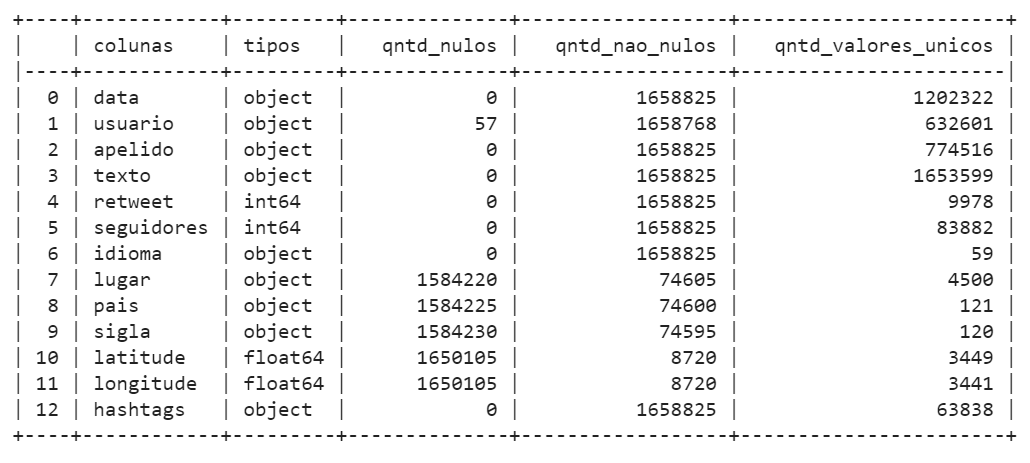

Os tipos de variáveis que consistem o dataframe são *object* (string), *int64* (número inteiro) e *float64* (número real). Dados relativos a data, *username*, nome de perfil, tweet, país, sigla e lugar são informações textuais. As colunas retweet e seguidores possuem dados quantitativos cujo menor valor é zero. Latitude e longitude são referentes as coordenadas geográficas, portanto, representados por números reais. 

Em termos de porcentagem de valores nulos e não nulos, temos os seguintes gráficos abaixo:

In [ ]:
#Gera pie charts para quantidades nulas e não nulas para as colunas:
#usuario, sigla, lugar, pais, latitude e longitude

fig, eixos = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

eixos[0,0].pie([df_original.usuario.notnull().sum(), df_original.usuario.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[0,0].set_title('Usuários',  fontsize=10)
eixos[0,0].axis('equal')


eixos[0,1].pie([df_original.sigla.notnull().sum(), df_original.sigla.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[0,1].set_title('Siglas',  fontsize=10)
eixos[0,1].axis('equal')

eixos[1,0].pie([df_original.lugar.notnull().sum(), df_original.lugar.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[1,0].set_title('Lugares',  fontsize=10)
eixos[1,0].axis('equal')

eixos[1,1].pie([df_original.pais.notnull().sum(), df_original.pais.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[1,1].set_title('Países',  fontsize=10)
eixos[1,1].axis('equal')

eixos[2,0].pie([df_original.latitude.notnull().sum(), df_original.latitude.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[2,0].set_title('Latitude',  fontsize=10)
eixos[2,0].axis('equal')

eixos[2,1].pie([df_original.longitude.notnull().sum(), df_original.longitude.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[2,1].set_title('Longitude',  fontsize=10)
eixos[2,1].axis('equal')

# Ajusta o espaço entre os gráficos
plt.subplots_adjust(wspace=1)
plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/resumo_piechar_nulos_naoNulos.png')
plt.show()

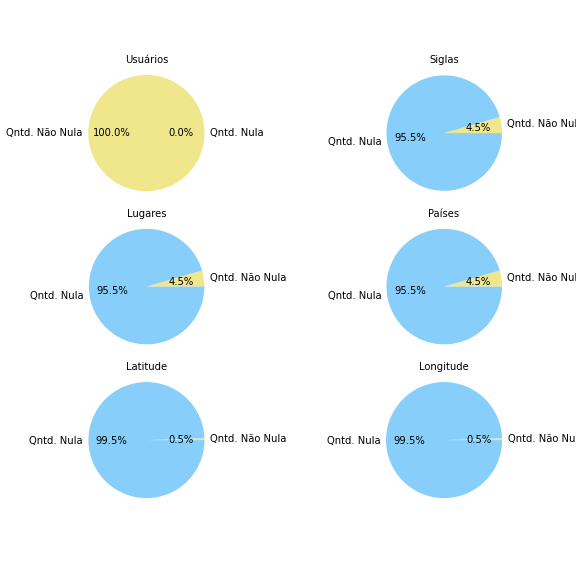

O gráfico acima mostra que, para as colunas em destaque, há poucos itens no dataframe que foram informados. 

## Tratamento de Dados

De acordo com os achados apresentados anteriormente, as colunas *usuario*, *lugar*, *pais*, *sigla*, *latitude* e *longitude* possuem grande quantidade de valores nulos. As quatro primeiras colunas terão os espaços vazios preenchidos. Por conta da natureza dos atributos, *latitude* e *longitude* serão mantidos como estão para uma análise posterior.

A seguir, temos o preenchimento de dados aplicados somente nas colunas *usuario*, *lugar*, *pais* e *sigla*. 

In [ ]:
df_original['usuario'] = df_original['usuario'].fillna('')
df_original['lugar'] = df_original['lugar'].fillna('Não Informado')
df_original['pais'] = df_original['pais'].fillna('Não Informado')
df_original['sigla'] = df_original['sigla'].fillna('Não Informado')

Em uma busca manual, foi percebido que existem tweets em línguas estrangeiras que com o valor **pt** na coluna idioma. Abaixo podemos conferir alguns exemplos:

In [ ]:
textos = df_original[['texto', 'idioma', 'pais']].loc[[231939, 48469, 32238]]
print(tabulate(textos, headers = 'keys', tablefmt = 'psql'))

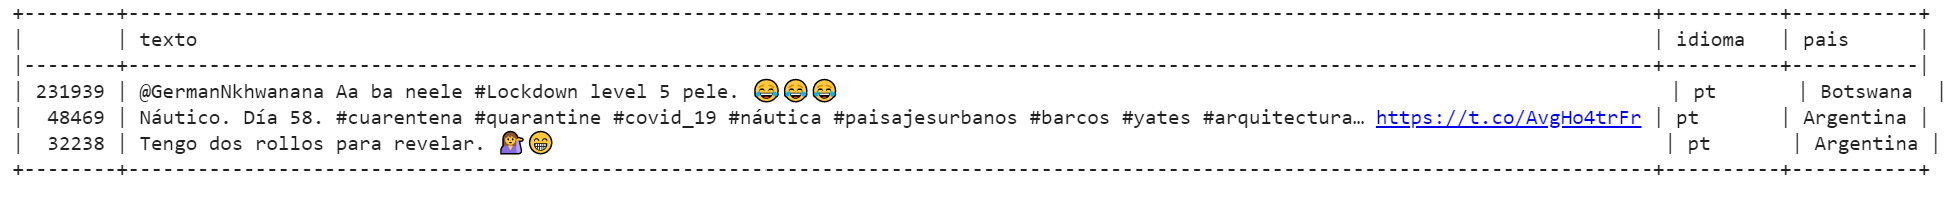

Inicialmente foram experimentadas algumas das bibliotecas disponíveis para detecção automática de idiomas. Foram elas **langdetect**, **TextBlob** e **googletrans** (um API do Google Tradutor).

Langdetect e TextBlop apresentaram limitações quanto ao tamanho do texto (tweet) e a quantidade de requisições seguidas. Já o Google Tradutor, apesar de não ter apresentado nenhum dos impedimentos das bibliotecas mencionadas anteriormente, não se mostrou um tradutor confiável. Ademais, todas as três bibliotecas detectaram idiomas errados diversas vezes (pt -> en e vice-versa). Isto provavelmente se deve ao linguajar informal, que pode conter palavras de outros idiomas (crush, top, le, etc.) ou mesmo reduções de palavras e suas variações (q, pq, tô, to, etc.), que podem dificultar a identificação correta do idioma de um texto. 

As divergências idiomáticas apresentadas no dataset podem se dar pelos seguintes fatores:
* Um país pode ter uma língua oficial, mas possui outras não oficiais.
* Um país possui mais de uma língua oficial.
* O usuário do twitter é poliglota.

Ademais, a identificação do idioma não é relevante para os dois tipos de análises realizados neste trabalho. Portanto, a atividade foi descontinuada.  

Ainda na busca manual, foi conferido que existem itens repetidos:

In [ ]:
textos = df_original[['apelido', 'texto']].loc[[234865, 551107, 133775, 813962]]
print(tabulate(textos, headers = 'keys', tablefmt = 'psql'))

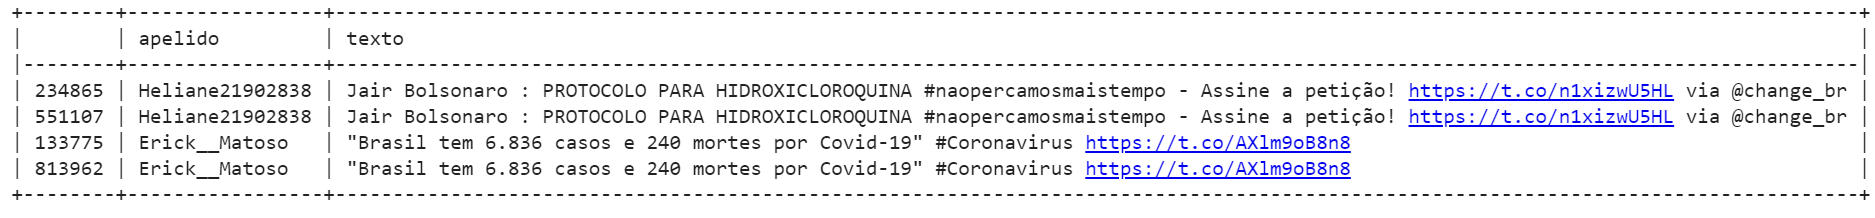

Para tanto, foi aplicada a função de remoção de linhas duplicadas:

In [ ]:
df_reduzida = pd.DataFrame.drop_duplicates(df_original)
print('Foram removidas', df_original.shape[0] - df_reduzida.shape[0], 'linhas.')
print('Quantidade atual de linhas: '+ format(df_reduzida.shape[0])+'.')

Foram removidas 2 linhas.
Quantidade atual de linhas: 1658823.


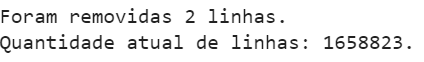

A remoção da linhas duplicadas mostra que haviam 2 tweets repetidos (de diferentes usuários) no dataset. Somente os tweets originais permaceram no dataset.

###**Métodos de Detecção de Perguntas**


Foram desevolvidas duas funções que auxiliam na aquisição de um trecho específico de um tweet, o que contém a(s) pergunta(s). Cada pergunta se torna um novo item em um novo dataframe (DuvidasDB). O novo dataframe contém o índice do dataframe original (df_reduzida) e seus respectivos dados para uso posterior. Como delimitador, buscamos apenas frases que terminem com ponto de interrogação, a fim de não delimitar abundamentemente a identificação e aquisição de perguntas. Vale lembrar que existem línguas estrangeiras que não utilizam o ponto de interrogação com frequência, ou mesmo faz parte da regra gramatical formal. 

In [ ]:
def get_question_by_text(text):
  questions = []
  text = text.replace('\n', ' ')

  float_number = re.search(r'(\d+.\d+)', text)
  if float_number:
    float_number = float_number.group(0)
    replace_str = float_number.replace('.', ',')
    text = re.sub(r'(\d+.\d+)', replace_str, text)

  regular_expression = '(\S[^?.!]*[?!.]*)*'
  sentences = re.split(regular_expression, text)
  for sentence in sentences:
    if not sentence.isspace() and '?' in sentence:
      questions.append(sentence)
  return questions

def extract_questions(df_reduzida):
  dic = []
  for index, row in df_reduzida.iterrows():

    questions = get_question_by_text(row['texto'])

    for question in questions:

      dic.append({'id': index, 
                  'pergunta': question,
                  'idioma': row['idioma'],
                  'data': row['data'], 
                  'apelido': row['apelido'], 
                  'retweet': row['retweet'],
                  'seguidores': row['seguidores'],
                  'lugar': row['lugar'],
                  'pais': row['pais'],
                  'sigla': row['sigla'],
                  'latitude': row['latitude'],
                  'longitude': row['longitude'],
                  'hashtags': row['hashtags']})
  
  df_questions = pd.DataFrame(dic, 
                              columns = ['id',
                                         'pergunta',
                                         'idioma',
                                         'data',
                                         'apelido',
                                         'retweet',
                                         'seguidores',
                                         'lugar',
                                         'pais',
                                         'sigla',
                                         'latitude',
                                         'longitude',
                                         'hashtags'])
  return df_questions

In [ ]:
DuvidasDB = extract_questions(df_reduzida)

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


error: ignored

###**Classificação das Perguntas**

Os códigos das células abaixo mostarão as 50 palavras/termos mais comuns dentre os tweets. Esse mecanismo foi utilizado para auxiliar na produção de um dicionário contendo palavras-chaves que indicarão a classificação do tweet em questão. 

A lista de stopwords foi adquirida [neste link](https://github.com/stopwords-iso/stopwords-pt/blob/master/stopwords-pt.txt). A lista foi incrementada a cada iteração de identificação de palavras mais comuns, com o objetivo de obter o máximo de palavras-chaves possíveis.

In [ ]:
#Adquirindo uma lista de stopword, presente no Drive compartilhado.
stopwords = set(line.strip() for line in open ('/content/drive/Shared drives/trabalhoPratico_programacaoDS/pt_stop_words.txt'))

In [ ]:
#Instanciar um dicionário onde, para cada palavra contada, a palavra (inexistente no dict).
#Se já existir, sua contagem incrementa.

wordcount = {}

for index, row in DuvidasDB.iterrows():
  for word in row['pergunta'].lower().split():
      word = word.replace(".","")
      word = word.replace(",","")
      word = word.replace(":","")
      word = word.replace("\"","")
      word = word.replace("!","")
      word = word.replace("â€œ","")
      word = word.replace("â€˜","")
      word = word.replace("*","")
      word = word.replace("?","")
      word = word.replace("+","")
      if word not in stopwords:
          if word not in wordcount:
              wordcount[word] = 1
          else:
              wordcount[word] += 1

In [ ]:
#Imprime as palavras mais repetidas:

n_print = 10

print("As {} palavras mais mencionadas são as seguintes:".format(n_print))
word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

Abaixo, temos o dicionário que gerado manualmente. Sua construção também tem base em pesquisas a parte. 

In [ ]:
dict_categorias = {
'cura':'Medicamento',
'tratamento':'Medicamento',
'curar':'Medicamento',
'cloroquina':'Medicamento',
'hidroxicloroquina':'Medicamento',
'ministro':'Pessoas',
'ministério':'Organizações',
'emissora':'Organizações',
'jornal':'Organizações',
'contra':'Medicamento',
'combate': 'Medicamento',
'especialista':'Pessoas',
'mandetta':'Pessoas',
'melhora':'Medicamento',
'vacina':'Medicamento',
'vacinas':'Medicamento',
'tamiflu':'Medicamento',
'atazanavir':'Medicamento',
'remdesivir':'Medicamento',
'ivermectina':'Medicamento',
'azitromicina':'Medicamento',
'who':'Organizações',
'oms':'Organizações',
'organização':'Organizações',
'organizações':'Organizações',
'fiocruz':'Organizações',
'fundação': 'Organizações',
'fundações': 'Organizações',
'funasa':'Organizações',
'opas':'Organizações',
'pan-americana': 'Organizações',
'teich':'Pessoas',
'etienne':'Pessoas',
'@jairbolsonaro':'Pessoas',
'bolsonaro':'Pessoas',
'@lhmandetta':'Pessoas',
'@jdoriajr':'Pessoas',
'doria':'Pessoas',
'dória':'Pessoas',
'@bolsonarosp':'Pessoas',
'@veramagalhaes':'Pessoas',
'@minsaude':'Organizações',
'@folha':'Organizações',
'@estadao':'Organizações',
'folha':'Organizações',
'Estadão':'Organizações',
'@rodrigomaia':'Pessoas',
'@g1':'Organizações',
'g1':'Organizações',
'@teichnelson':'Pessoas',
'@wilsonwitzel':'Pessoas',
'@o_antagonista':'Pessoas',
'@cnnbrasil':'Organizações',
'@rconstantino':'Pessoas',
'@uolnoticias':'Organizações',
'ivermectina':'Medicamento',
'@osmarterra':'Pessoas',
'@carlosbolsonaro':'Pessoas',
'@bbcbrasil':'Organizações',
'trump':'Pessoas',
'uso':'Medicamento',
'mascara':'Medicamento',
'máscara':'Medicamento',
'alcool':'Medicamento',
'álcool':'Medicamento',
'gel':'Medicamento',
'70%':'Medicamento',
'combater':'Medicamento',
'doença':'Doença',
'pandemia':'Doença',
'corona':'Doença',
'coronavírus':'Doença',
'coronavirus':'Doença',
'coronga':'Doença',
'covid-19':'Doença',
'covid19':'Doença',
'covid':'Doença',
'sars-cov-2':'Doença',
'sintoma':'Doença',
'sintomas':'Doença',
'caso':'Doença',
'casos':'Doença',
'covidao':'Doença',
'infecção': 'Doença',
'contágio':'Doença',
'coriza':'Doença',
'dor':'Doença',
'febre':'Doença',
'falta':'Doença',
'ar':'Doença',
'tosse':'Doença',
'vírus':'Doença',
'virus':'Doença',
'isolamento':'Doença',
'distanciamento':'Doença',
'social':'Doença',
'distancing':'Doença',
'quarentena':'Doença',
'quarentine':'Doença',
'cuarentena':'Doença',
'quarenteners':'Doença',
'quarentener':'Doença'
}

A função classificador() recebe a pergunta e cada palavra da frase é comparada aos termos existentes no dicionário. Se iguais, o retorno é a categoria respectiva da palavra. Caso não sejam iguais, a categoria devolvida é *Outro*, que pode ser definida por diversas peculiaridades (a pergunta está em outro idioma, o contexto não faz referência direta ao vírus, etc.).

In [ ]:
#Função classificadora de tuítes
#Antes de comparações, retira as pontuações finais (o que vier a partir do '?')
#Recebe o texto do tuíte e retorna a classificação

def classificador(texto):

  inicio = texto.find('?')
  t = texto[:-(len(texto) - inicio)]

  t = t.split()

  for palavra in t:
    l = len(palavra)
      
    for key, value in dict_categorias.items():
      if ( palavra.lower() == key):
        return value

  return 'Outro'

Abaixo temos o dataframe atualizado com as categorias das suas respectivas perguntas. 

In [ ]:
DuvidasDB['categoria'] = DuvidasDB.apply(lambda row: classificador(row['pergunta']), axis = 'columns')

##Persistência dos Dados

In [ ]:
#Persistência dos dados já obtidos
DuvidasDB.to_csv('/content/drive/Shared drives/trabalhoPratico_programacaoDS/DuvidasDB.csv', sep = '|')  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
DuvidasDB = pd.read_csv('/content/drive/Shared drives/trabalhoPratico_programacaoDS/DuvidasDB.csv', sep = '|', skiprows = 0, encoding = 'utf-8')

##**Análise Geográfica**

In [ ]:
#Obtenção de um dataset que contém a geometria de todos os países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
#Devolve um dataframe filtrado com a categoria informada
#Se tiver uma coluna geometry, a função a exclue.

def get_df_categoria(df, categoria):

  if ('geometry' in df):
    df.drop(['geometry'], axis=1, inplace = True)

  return df.query('categoria == @categoria')

In [ ]:
#Função geradora de geodataframe

def get_geodataframe(df):
  return GeoDataFrame(df, geometry = gpd.points_from_xy(df.latitude, df.longitude))

In [ ]:
#Seleção de dataframes organizados por categorias:
#Também inclui a exclusão da coluna geometry

#Categoria Doença
df_geo_doenca = get_df_categoria(DuvidasDB, 'Doença')

#Categoria Medicamento
df_geo_med = get_df_categoria(DuvidasDB, 'Medicamento')

#Categoria Organizações
df_geo_org = get_df_categoria(DuvidasDB, 'Organizações')

#Categoria Pessoas
df_geo_pe = get_df_categoria(DuvidasDB, 'Pessoas')

#Categoria Outro
df_geo_outro = get_df_categoria(DuvidasDB, 'Outro')

In [ ]:
#Geração de geodataframes de cada categoria:

gdf_doenca = get_geodataframe(df_geo_doenca)

gdf_med = get_geodataframe(df_geo_med)

gdf_org = get_geodataframe(df_geo_org)

gdf_pe = get_geodataframe(df_geo_pe)

gdf_outro = get_geodataframe(df_geo_outro)

In [ ]:
#Gera gráfico de distribuição mundial das categorias das perguntas

ax = world.plot(color='white', 
                marker = 'o', 
                edgecolor='grey', 
                markersize = 20,
                figsize=(16, 10))

gdf_outro.plot(ax=ax, color='brown', label = 'Outro')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doença')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organizações')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

ax.set_title('Distribuição Mundial - Categorias de Perguntas',fontsize=20)
ax.axis('off') #Retira os marcadores de latitude e longitude da visualização do gráfico

plt.legend(loc = 'center left')
plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/geo_mundo_categorias.png')
plt.show()

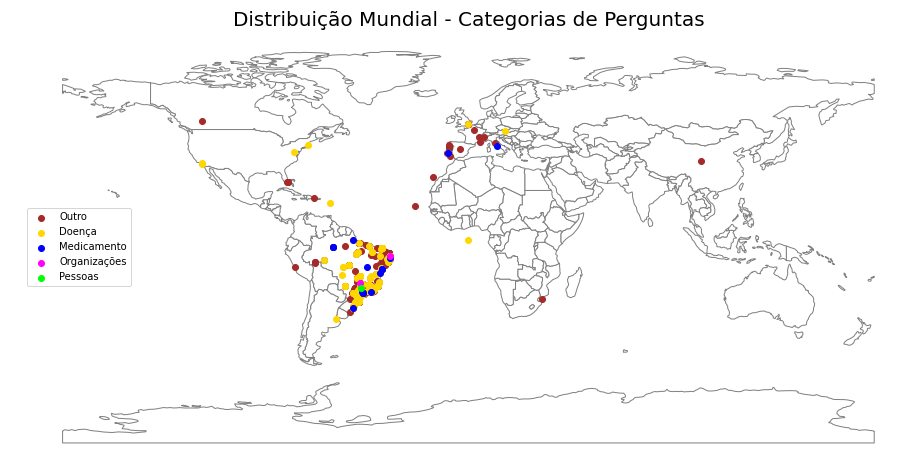

De acordo com o gráfico acima, podemos observar que:
*   O Brasil contém a maior quantidade de perguntas realizadas.
*   Somente no Brasil temos perguntas com foco em Organizações e Pessoas.
*   A Europa Ocidental tende a fazer perguntas relacionadas ao vírus em si e aos medicamentos sendo estudados.
*   China, África do Sul e Canadá costumam fazer questionamentos de focados em temas não considerados. Cabo Verde, no entanto, mostra interesse em questões da COVID-19.
*   Os Estados Unidos da América demandam respostas sobre o vírus e em outros contextos. 
*   Curiosidades dos países localizados no Mar do Caribe são voltadas a doença.  





###Perguntas realizadas no Brasil

Como visto anteriormente, o Brasil concentra a maior quantidade de perguntas realizadas por usuários, além de ser o único país no mundo a ter ocorrências únicas nas categorias Organizações e Pessoas. 

Os arquivos shape, utilizados no gráfico de visão estadual do Brasil, foram adquiridos [neste link](http://www.codegeo.com.br/2013/04/shapefiles-do-brasil-para-download.html) e salvos no Drive Compartilhado da dupla. 





In [ ]:
#Aquisição de arquivos shape dos estados brasileiros
brazil_estados = gpd.read_file('/content/drive/Shared drives/trabalhoPratico_programacaoDS/shapes/estados_2010.shp')

In [ ]:
#Função que renderiza textos em mapas
def text(x, y, text):
    ax.text(x, y, text,
            ha='center', va='top', weight='bold', color='black')

In [ ]:
#Gera um dataframe (a partir de outro) filtrando por país específico.

def get_df_pais(df, pais):
  return df.query('pais == @pais')

In [ ]:
#Gera gráfico, com divisórias estaduais, da distribuição
#geográfica das categorias

ax = brazil_estados.plot(color='ghostwhite', 
                         edgecolor='grey', 
                         marker = 'D',
                         markersize = 50,
                         figsize=(10, 8))

#Filtrando e adquirindo perguntas feitas no Brasil
gdf_outro = get_df_pais(gdf_outro, 'Brazil') 
gdf_outro.plot(ax=ax, color='brown', label = 'Outro')

gdf_doenca = get_df_pais(gdf_doenca, 'Brazil')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doença')

gdf_med = get_df_pais(gdf_med, 'Brazil')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')

gdf_org = get_df_pais(gdf_org, 'Brazil')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organizações')

gdf_pe = get_df_pais(gdf_pe, 'Brazil')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

#Colocando tags nos estados
text(-73, -11, "AC")
text(-73, -3, "AM")
text(-63, 6, "RR")
text(-65, -13, "RO")
text(-53, 4, "AP")

text(-53, -7, "PA")
text(-62, -16, "MT")
text(-60, -20, "MS")
text(-56, -25, "PR")
text(-47, -27, "SC")

text(-50, -32, "RS")
text(-43, 0, "MA")
text(-48, -11, "TO")
text(-51, -17, "GO")
text(-45, -24, "SP")

text(-44, -8, "PI")
text(-37, -14, "BA")
text(-45, -18, "MG")
text(-39, -1.5, "CE")
text(-34, -4, "RN")

text(-33, -6.5, "PB")
text(-33.5, -8, "PE")
text(-34, -9, "AL")
text(-36, -11, "SE")
text(-39, -19.5, "ES")
text(-40, -22, "RJ")
#

ax.set_title('Distribuição por Estados do Brasil',fontsize=20)
ax.axis('off')

plt.legend(loc = 'upper right')
plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/geo_estadual_brazil.png')
plt.show()

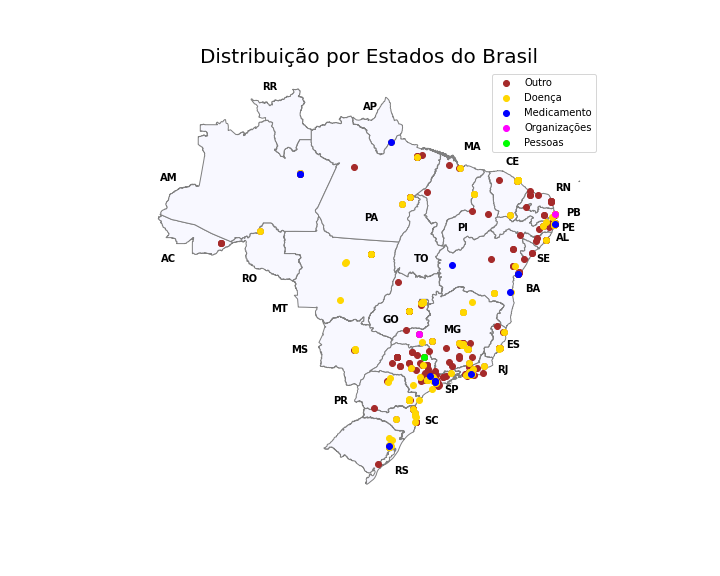

De acordo com o gráfico abaixo, podemos afirmar que o Sudeste (estados de São Paulo e Rio de Janeiro, em especial) é a região que tende a fazer perguntas de diversos contextos, seguido do Nordeste. Basta lembrar que o Sudeste e Nordeste foram os primeiros locais no Brasil a ter casos suspeitos e confirmados. 

A quantidade de perguntas nas regiões Sudeste e Nordeste podem se dar pelas seguintes razões: 
*   Presença de aeroportos internacionais.
*   Presença de pontos turísticos preferidos.

Os estados da região Norte e Sul mostram interesses em comum voltados para tópicos referentes ao vírus e sua cura. Quem mora na região Centro-Oeste (Goiás, Mato Grosso e Mato Grosso do Sul) tem tendência a indagar sobre a doença em si (sintomas, estatísticas, etc.), descobertas de medicamentos, dentre outros enfoques.

Em relação a curiosidades locais referentes Pessoas, devemos também lembrar que políticos locais estavam bem envolvidos com organizações ligadas a saúde e/ou no combate ao coronavírus. Em São Paulo, por exemplo, temos a única amostra no país envolvendo a categoria Pessoas. Pode ser un indicativo ligado aos atos do governador de São Paulo, João Doria. 

No Estado da Paraíba, onde foi realizada uma pergunta sobre Organizações, ocorreu um evento que pode ter ligação com o questionamento: todas os municípios do Brasil e governos federais receberam verba para enfrentar a COVID-19, porém a cidade de Várzea foi a menos prestigiada, recebendo apenas R$28,04.

Nenhuma pergunta foi feita por quem estava em Tocantins e Roraima. Rondônia e Acre apresentam, respectivamente, perguntas sobre a doença e de outro contexto. Isto pode estar ligado com a baixa densidade populacional de suas cidades e pela baixa atividade em aeroportos. Como consequência, a contaminação é minimizado e o pânico populacional é amenizado em comparação às cidades de outros estados. 

Consideração Final: como fora dito anteriormente, os estados das regiões Sudeste e Nordeste foram os primeiros com grande quantidade de casos suspeitos e confirmados. Enquanto a contaminação ocorria em alta escala nestes estados, os governos dos demais estados já introduziam à população o conceito e prática de distanciamento social, de higiene e limpeza constantes. 


##**Análise Temporal**


Utilizamos vários tipos gráficos com o intuito de ter uma visão [texto do link](https://)

####Visão Quantitativa de Perguntas

A respeito da relação quantidade de tweets por mês, temos o seguinte gráfico em barras:

In [ ]:
df_original['mes'] = pd.DatetimeIndex(df_original['data']).month

In [ ]:
df_tweets_mes = df_original['mes'].value_counts().to_frame()
df_tweets_mes = df_tweets_mes.rename(columns = {'mes':'qntd_mes'})
df_tweets_mes['num_mes'] = df_tweets_mes.index
df_tweets_mes.reset_index(drop=True, inplace=True)
df_tweets_mes = df_tweets_mes.sort_values(by='num_mes')

In [ ]:
def defineNomeMes(num_mes):
  if (num_mes == 1):
    return 'Janeiro'
  elif (num_mes == 2):
    return 'Fevereiro'
  elif (num_mes == 3):
    return 'Março'
  elif (num_mes == 4):
    return 'Abril'
  elif (num_mes == 5):
    return 'Maio'
  elif (num_mes == 6):
    return 'Junho'
  elif (num_mes == 7):
    return 'Julho'
  else:
    return 'outro'

In [ ]:
df_tweets_mes['nome_mes'] = df_tweets_mes.apply(lambda row: defineNomeMes(row['num_mes']), axis = 'columns')

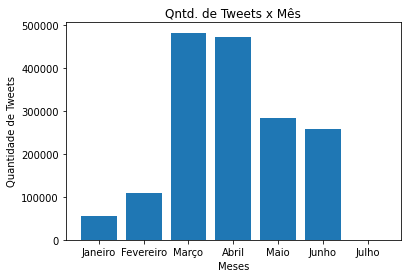

In [ ]:
#Quantidade de Tweets x mês

plt.bar(df_tweets_mes.nome_mes, df_tweets_mes.qntd_mes)
plt.title('Qntd. de Tweets x Mês')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Tweets')
plt.savefig('qntd_tweets_por_mes_df_original.png')
plt.show()

No gráfico acima, podemos observar que:

*   Conforme a COVID-19 é espalhada no exterior a quantidade de tweets sobre o assunto aumenta.
*   Chega ao pico no mês de março, onde diversas metrópoles começam a anunciar casos suspeitos e confirmados. 
*   Em abril ainda temos um número alto de postagens. Trata-se do período em que cidades iniciam o período de quarentena e reforçam mensagens do protocolo de distanciamento social e higiene. 
*   No mês seguinte, há uma queda de aproximadamente 39,68%. Pode-se supor que a queda se dá pela transferência da menção textual ao vírus para menções audiovisuais (memes e vídeos, por exemplo), abordagens indiretas referentes a pandemia, quarentena e pelo emprego dos protocolos de higiene e distantiamento social estipulados mundialmente. Ocorre uma leve queda na transição para o mês de Junho.
*   Em Julho, não há contagem significativa de tweets postados. 



### **Análise por categoria das perguntas**

Foram utilizado diversos gráficos para análise dos dados temporais:  
*   O gráfico line (lineplot) para mostar uma visão mais ampla do dataframe.
*   O gráfico de barra para permitir uma visão diária dos dados.
*   Mapa de calor para visualizar os horários com maior publicação de cada dia. 

Além disso, todos os gráficos possuem filtros facilitadores de análise visual.


In [ ]:
# Criando cópia do dataframe de pergunta
df_duvidas_copy = DuvidasDB.copy()

#### Divisão dos tweets por dia (lineplot)

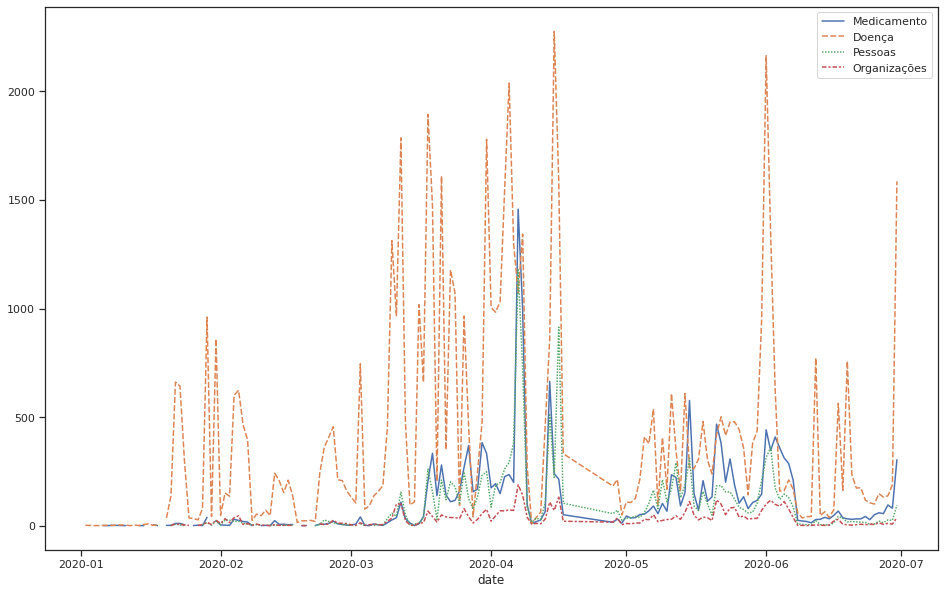

In [ ]:
# Método criar base com uma coluna para cada categoria
def gerar_df_lineplot(df, categoria):
  alias_categories = {
      'medicamento': 'Medicamento',
      'doenca': 'Doença',
      'pessoas': 'Pessoas',
      'organizacoes': 'Organizações',
      'todos': None
  }
  categoria = alias_categories[categoria]

  categorias = [categoria]
  if not categoria:
    categorias = ['Medicamento', 'Doença', 'Pessoas', 'Organizações']
    
  list_df = []
  for categoria in categorias:
    df = df_duvidas_copy.loc[df_duvidas_copy['categoria'] == categoria].copy()
    df[['data', 'categoria']].groupby(['data', 'categoria']).count()

    df = (pd.to_datetime(df['data'])
          .dt.floor('d')
          .value_counts()
          .rename_axis('date')
          .reset_index(name=categoria))
    df.date = pd.to_datetime(df.date)
    list_df.append(df.copy())
  df_coc = pd.concat(list_df)
  df_coc.set_index('date', inplace=True)
  return df_coc


#@markdown Formulário para a busca dos tweets
categoria = "todos" #@param ["medicamento", "doenca", "pessoas", "organizacoes", "todos"]

df_lineplot = gerar_df_lineplot(df_duvidas_copy, categoria)
df_lineplot


plt.figure(figsize=(16, 10))

sns.set_theme(style="ticks")
sns.lineplot(data=df_lineplot)

Através do gráfico acima, podemos realizar algumas inferências:
*  Doença é o tema mais perguntado independente do mês.
*  Medicamento era pouco perguntado entre os meses de janeiro e até o início de março.
*  Os temas Medicamento e Pessoas tem um comportamento análogo dentro do gráfico, juntamente com Organizações - embora proporcionalmente menor.
*  Organização é o tema menos perguntado.

#### Divisão dos tweets por dia (barplot)


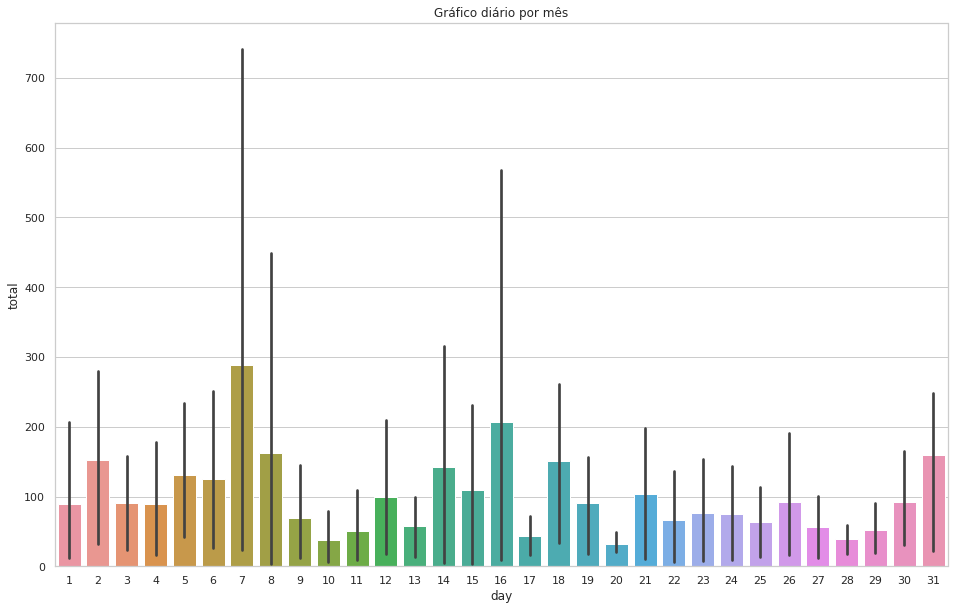

In [ ]:
# Método criar base com uma coluna para cada categoria
def gerar_df_barplot(df, categoria, dt_start, dt_end):
  alias_categories = {
      'medicamento': 'Medicamento',
      'doenca': 'Doença',
      'pessoas': 'Pessoas',
      'organizacoes': 'Organizações'
  }

  categoria = alias_categories[categoria]
  df = df_duvidas_copy.loc[df_duvidas_copy['categoria'] == categoria].copy()
  df[['data', 'categoria']].groupby(['data', 'categoria']).count()

  df = (pd.to_datetime(df['data'])
        .dt.floor('d')
        .value_counts()
        .rename_axis('date')
        .reset_index(name='total'))
  
  df.date = pd.to_datetime(df.date)
  
  filter_dt_start = (df['date'] >= pd.to_datetime(dt_start)) 
  filter_dt_end = (df['date'] <= pd.to_datetime(dt_end))
  df = df.loc[filter_dt_start & filter_dt_end]

  df['day'] =  df['date'].dt.day
  df['weekday'] = df['date'].dt.weekday

  return df

#@markdown Formulário para a busca dos tweets
date_inicio = "2020-01-01" #@param {type:"date"}
date_final = "2020-06-30" #@param {type:"date"}
categoria = "pessoas" #@param ["medicamento", "doenca", "pessoas", "organizacoes"]

df_bp = gerar_df_barplot(df_duvidas_copy, categoria, date_inicio, date_final)

if len(df_bp) > 0:
  plt.figure(figsize=(16, 10))
  sns.set_theme(style="whitegrid")
  ax = sns.barplot(x="day", y="total", data=df_bp).set_title("Gráfico diário por mês")
else:
  print(f'O período entre {date_inicio} e {date_final} não possui registros.')

###### Análise dos temas

**Tema Doença**
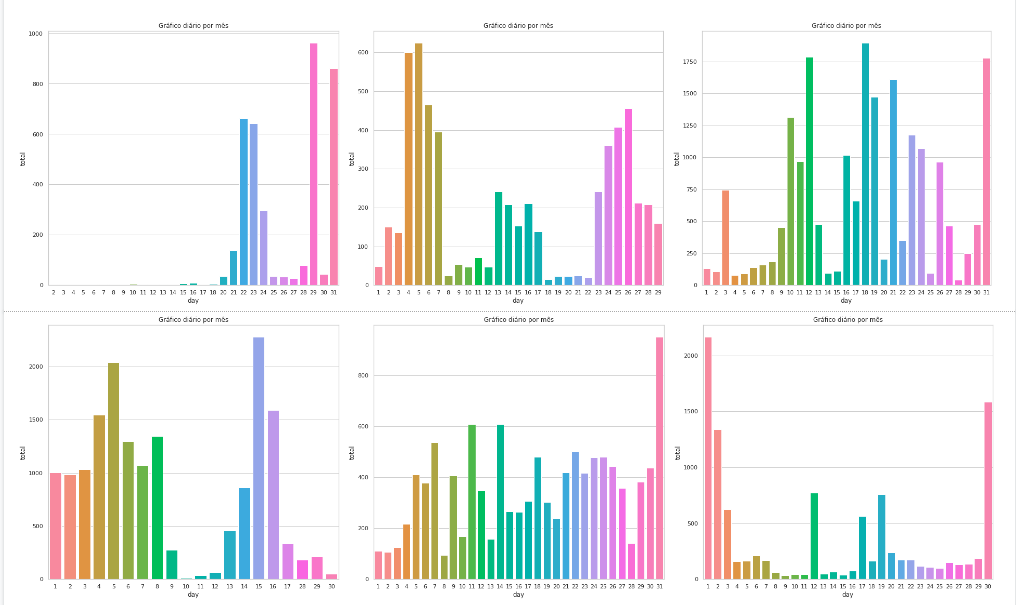


O tema Doença só começou gerar um volume maior de perguntas a partir da metade do mês de janeiro. Foi observado que em todos os meses (janeiro a junho) houve picos seguido de de uma diminuição nas publicações. A impressão que foi gerada é que sempre que ocorria uma nova notícias as pessoas voltavam a se questionar sobre doença. Um exemplo disso é o dia 22 de janeiro quando foi anunciado um caso suspeito em Belo Horizonte e no dia 29 de janeiro quando o Ministério da Saúde anuncia 9 casos suspeitos de coronavírus no Brasil.

**Tema medicamento**
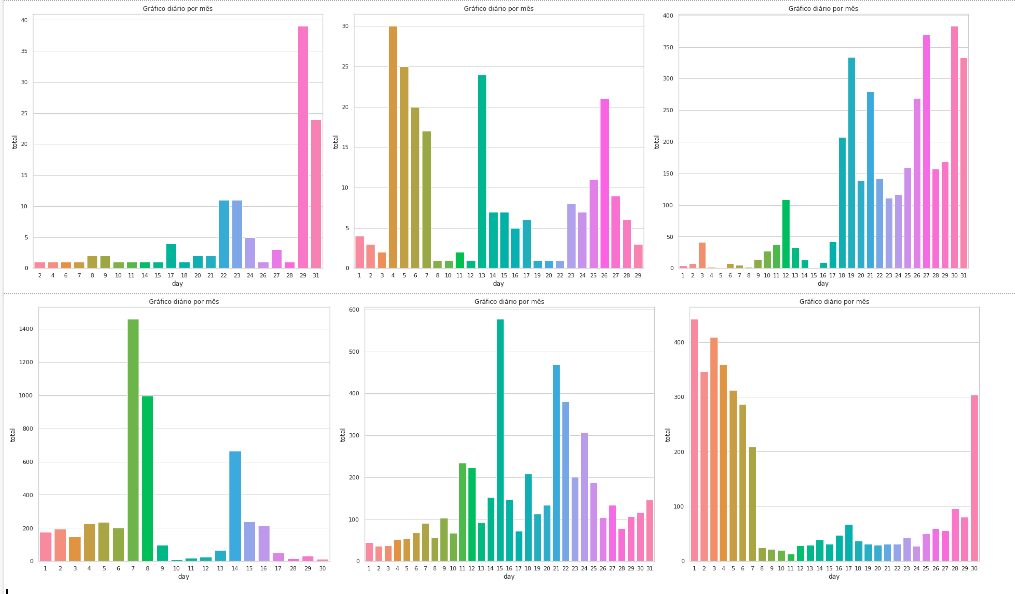

O tema Medicamento segue o padrão do comportamento do tema Doença, embora proporcionalmente menor. O gráfico de linha não mostra claramente esta ligação, mas através do agrupamento por dia é possível perceber o aumento e diminuição das postagem, confirmando um comportamento análogo a Doença.


**Tema pessoas**
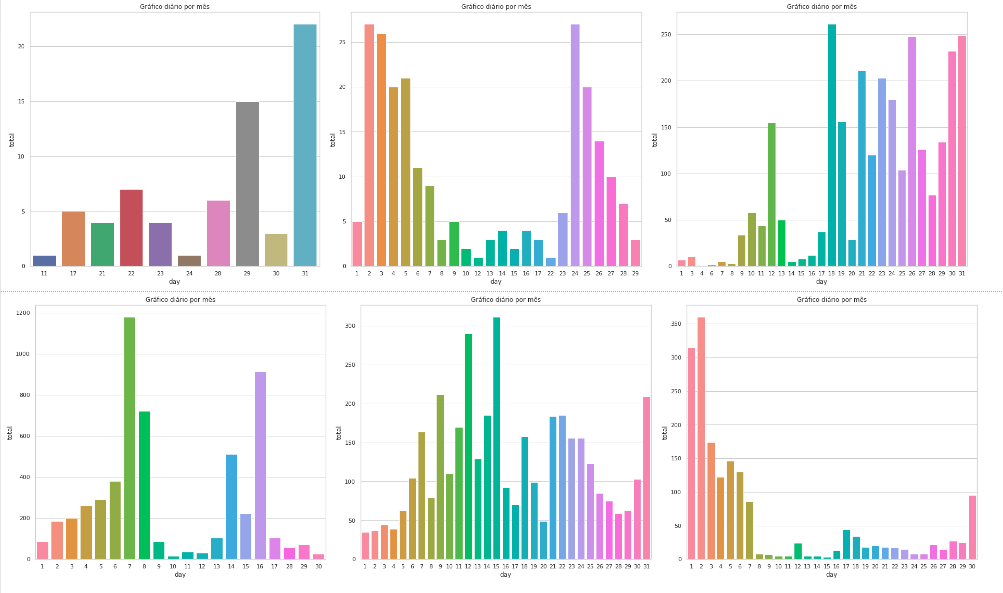

O tema Pessoas gerou poucas perguntas no mês de janeiro e no final do mês de junho. Entre janeiro e abril houve um aumento mensal do volume de perguntas, e uma diminuição a partir de maio. Provavelmente houve um aumento de dúvidas durante o período inicial da quarentena e quando ocorreu o afrouxamento dela.

**Tema organizações**
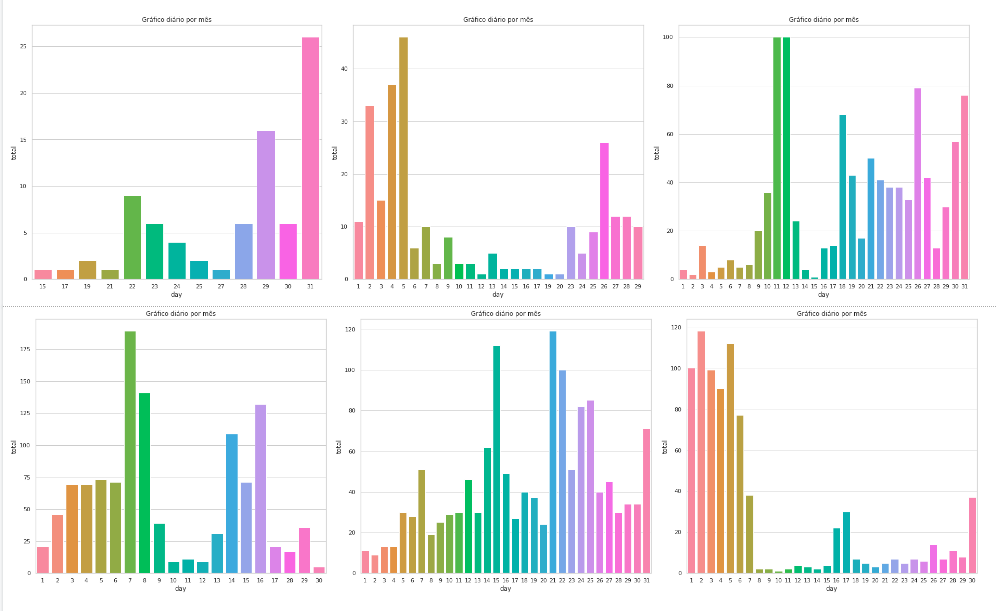

Assim como a categoria Pessoas, Organização gerou poucas perguntas no mês de janeiro e na metade de junto. Podemos associar a causa desse comportamento ao interesse das pessoas no temas que, durante o período da quarentena, estava mais rígida. 

#### Divisão dos tweets por hora (heatmap)



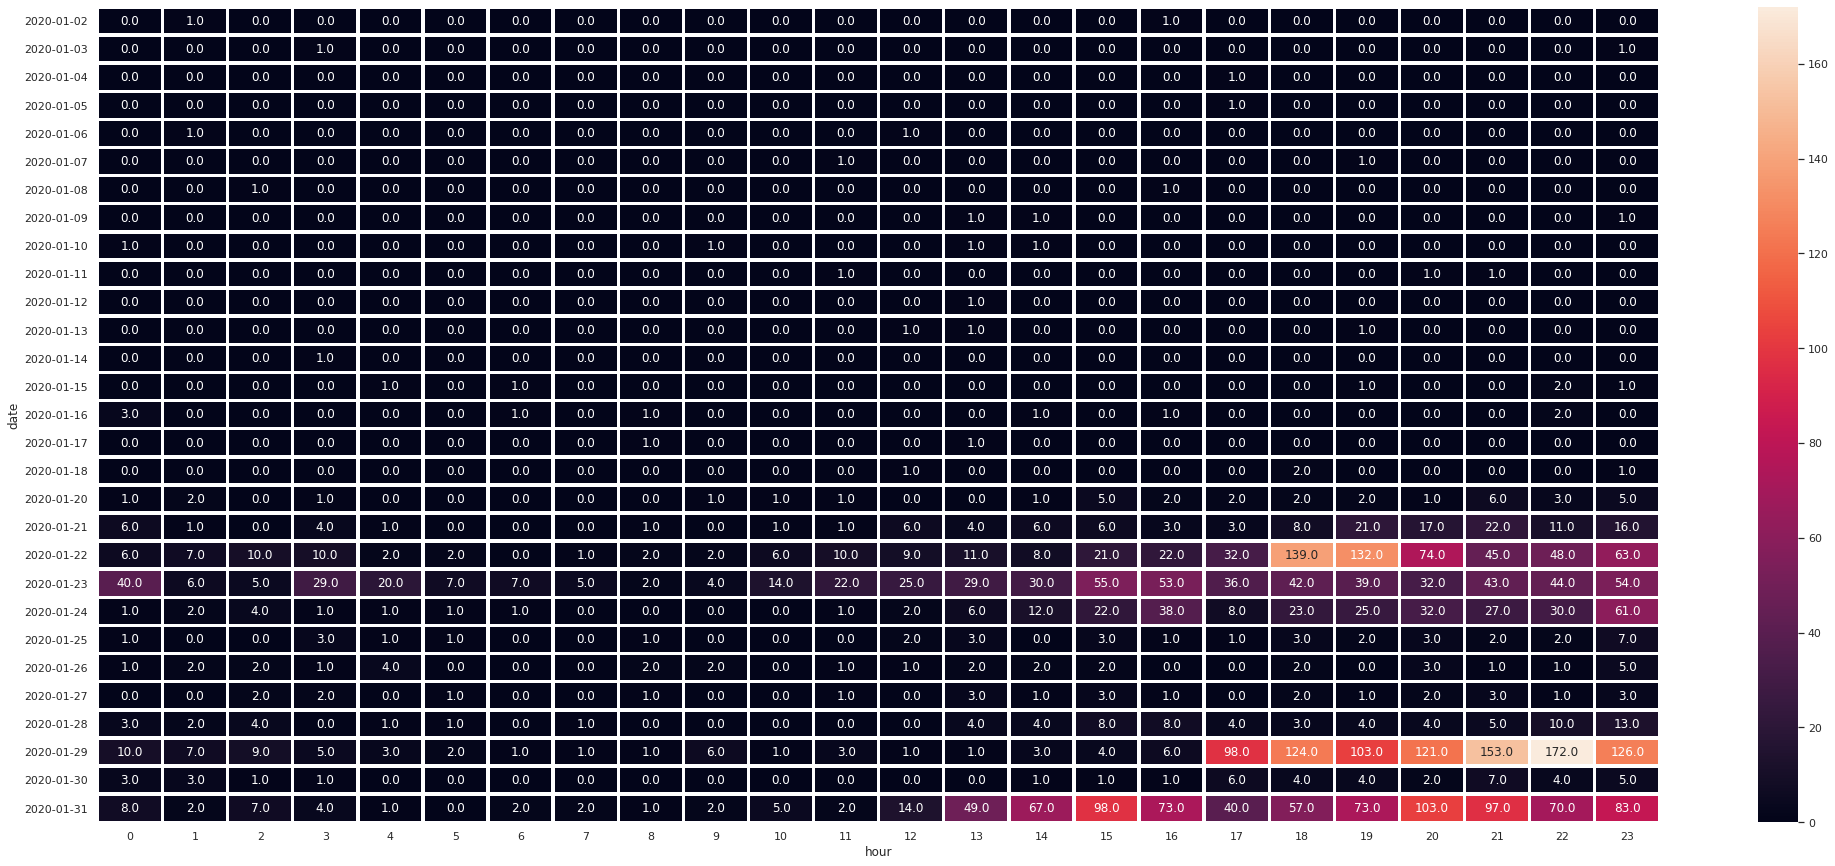

In [ ]:
# Método criar base com uma única coluna para todas as categorias
def gerar_df_heatmap(df, categoria, dt_start, dt_end):
  alias_categories = {
      'medicamento': 'Medicamento',
      'doenca': 'Doença',
      'pessoas': 'Pessoas',
      'organizacoes': 'Organizações'
  }
  categoria = alias_categories[categoria]

  df = df_duvidas_copy.loc[df_duvidas_copy['categoria'] == categoria].copy()
  df[['data', 'categoria']].groupby(['data', 'categoria']).count()

  df = (pd.to_datetime(df['data'])
        .dt.floor('h')
        .value_counts()
        .rename_axis('datetime')
        .reset_index(name='count'))

  df.datetime = pd.to_datetime(df.datetime)
  df['categoria'] = categoria
  df['date'] = df.datetime.dt.date
  df['hour'] = df.datetime.dt.hour

  filter_dt_start = (df['date'] >= pd.to_datetime(dt_start)) 
  filter_dt_end = (df['date'] <= pd.to_datetime(dt_end)) 

  df = df.loc[filter_dt_start & filter_dt_end]
  df = df.pivot("date", "hour", "count")
  df = df.fillna(0)

  return df

#@markdown Formulário para a busca dos tweets
date_inicio = "2020-01-01" #@param {type:"date"}
date_final = "2020-01-31" #@param {type:"date"}
categoria = "doenca" #@param ["medicamento", "doenca", "pessoas", "organizacoes"]

df_hm = gerar_df_heatmap(df_duvidas_copy, categoria, date_inicio, date_final)

if len(df_hm) > 0:
  f, ax = plt.subplots(figsize=(35, 15))
  sns.heatmap(df_hm, annot=True, fmt='', linewidths=2.5, ax=ax)
else:
  print(f'O período entre {date_inicio} e {date_final} não possui registros.')

O gráfico acima é um Mapa de Calor, que se mostra uma boa opção para a geração de gráficos que possuem uma grande quantidade de dados com mais de uma dimensão. 
Nesse gráfico trabalhamos com três colunas: *date*, *hour* e *count*. As colunas *date* e *hour* contêm as informações do dia e horário em que o tweet foi postado, respectivamente. E a coluna *count* é o agrupamento por hora dos tweets. Utilizamos essas três informações para conseguir visualizar melhor os horários de picos das postagens dos tweets.
